# Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing.

It contains modules on:
interpolation,
integration,
optimization,
image processing,
statistics,
special functions.

Numpy and scipy work hand in hand

The scipy routines are generally dependent on numpy routines

In [1]:
import numpy as np

In [2]:
# Linear Algebra operations
from scipy import linalg

a1 = np.array([[11, 22],[33, 44]])
linalg.det(a1)
#finding determinant

-242.0

In [5]:
linalg.det(np.ones((4, 4))) #determinant calculation requires a square matrix

0.0

In [6]:
lin_alg = np.matrix('[3 4 5; 2 6 1; 9 7 8]')
type(lin_alg)

lin_alg.I #dot product with identity matrix

matrix([[-0.39047619, -0.02857143,  0.24761905],
        [ 0.06666667,  0.2       , -0.06666667],
        [ 0.38095238, -0.14285714, -0.0952381 ]])

In [7]:
from scipy import linalg # import the library

## Finding the inverse of the matrix

linalg.inv(lin_alg)

array([[-0.39047619, -0.02857143,  0.24761905],
       [ 0.06666667,  0.2       , -0.06666667],
       [ 0.38095238, -0.14285714, -0.0952381 ]])

In [8]:
## Deteminant of the matrix 

linalg.det(lin_alg)

-104.99999999999997

In [9]:
## Computing norms:

linalg.norm(lin_alg)

16.881943016134134

In [10]:
# the dot product multiplication of input square matrix and the inverse of it gives an identity matrix
lin_alg_inv = linalg.inv(lin_alg)
    
np.dot(lin_alg,lin_alg_inv) ## gives a identity matrix

np.allclose(np.dot(lin_alg,lin_alg_inv), np.eye(3))

True

### SVD of a square matrix (decomposition)

In [11]:

mat = np.arange(25).reshape((5, 5)) + np.diag([1, 0, 1, 0, 1])
uarr, spec, vharr = linalg.svd(mat)

print('uarr: ', uarr, '\n',#Unitary matrix having left singular vectors as columns. Of shape (M, M) or (M, K)
     '\n','spec: ', spec, '\n',#The singular values, sorted in non-increasing order. Of shape (K,)
     '\n','vhar: ', vharr) #Unitary matrix having right singular vectors as rows. Of shape (N, N) or (K, N)

uarr:  [[-7.28530994e-02 -7.23125874e-01  4.08248290e-01  4.21495771e-01
  -3.57009867e-01]
 [-2.25327040e-01 -5.76636375e-01 -4.57966998e-16 -6.20198688e-01
   4.81738314e-01]
 [-3.89658798e-01 -2.20561712e-01 -8.16496581e-01  3.63816932e-01
   2.21161866e-02]
 [-5.41289284e-01  1.28088296e-01 -9.99200722e-16 -4.60012619e-01
  -6.92089366e-01]
 [-7.06464496e-01  2.82002449e-01  4.08248290e-01  3.06138094e-01
   4.01242240e-01]] 
 
 spec:  [70.46475745  2.91508394  1.          0.40195443  0.24223124] 
 
 vhar:  [[-3.88062152e-01 -4.14497206e-01 -4.47495993e-01 -4.69435101e-01
  -5.06929833e-01]
 [ 6.00136599e-01  4.67342021e-01  1.08217449e-02 -2.94374099e-01
  -5.78493109e-01]
 [ 4.08248290e-01  4.99600361e-16 -8.16496581e-01 -1.43635104e-15
   4.08248290e-01]
 [ 4.50907453e-01 -5.69746257e-01  3.63335688e-01 -5.13822058e-01
   2.75763924e-01]
 [-3.45339877e-01  5.34015641e-01  3.08340291e-02 -6.54951501e-01
   4.07007935e-01]]


In [12]:
#array spectrum
sarr = np.diag(spec)
sarr

array([[70.46475745,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.91508394,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.40195443,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.24223124]])

In [13]:
#original matrix can be re-composed by matrix multiplication of the outputs of svd with np.dot
svd_mat = uarr.dot(sarr).dot(vharr)
svd_mat

array([[ 1.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 13., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 25.]])

In [14]:
np.allclose(svd_mat, mat)

True

### Optimization  

Optimization is the problem of finding a numerical solution to a minimization or equality.
The scipy.optimize module provides algorithms for function minimization (scalar or multi-dimensional), 
curve fitting and root finding.


In [15]:
from scipy import optimize

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [16]:
#define a function to do curve fitting
def test_func(x, a, b):
    return a * np.sin(b * x)

In [17]:
# Using optimize to derive the parameters of the model
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

In [18]:
#Curve fitting: temperature as a function of month of the year

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

Text(0,0.5,'Min and max temperature')

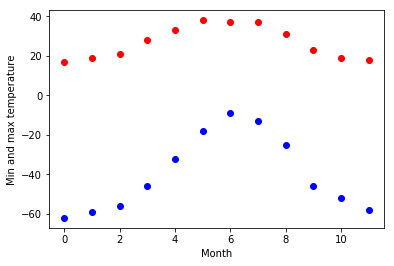

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [20]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

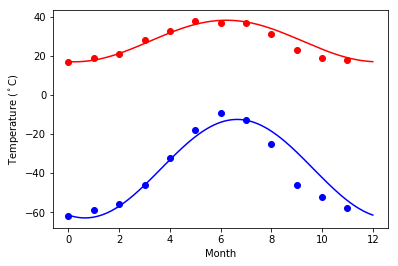

In [21]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [22]:
# finding the minimum of a scalar function
def f(x):
    return x**2 + 10*np.sin(x)

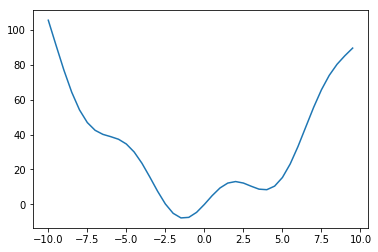

In [23]:
x = np.arange(-10, 10, 0.5)
plt.plot(x, f(x)) 

#This function has a global minimum around -1.8 and a local minimum around 4.8.

In [24]:
result = optimize.minimize(f, x0=0)
result ## Here x will give us the global minimum (try result.x)

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

### Limited-memory BFGS (L-BFGS or LM-BFGS)

Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that 
approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using a limited amount of computer memory. 
It is a popular algorithm for parameter estimation in machine learning.
As the function is a smooth function, gradient-descent based methods are good options. 
The lBFGS algorithm is a good choice in general

In [25]:
optimize.minimize(f, x0=0, method="L-BFGS-B")


#A possible issue with this approach is that, if the function has local minima, the algorithm may find these local 
#minima instead of the global minimum depending on the initial point x0

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

In [26]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

#If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to 
#costlier global optimization. To find the global minimum, we use scipy.optimize.basinhopping() 
#It combines a local optimizer with sampling of starting points

array([3.83746709])

In [27]:
optimize.basinhopping(f, 0)

# bringing contraints to the optimization process


                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[0.08582195]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1497
                        nit: 100
                       njev: 499
                          x: array([-1.30644001])

In [28]:
optimize.minimize(f, x0=0,bounds=((0, 10), ))

      fun: array([0.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([10.00000001])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
   status: 0
  success: True
        x: array([0.])

## Interpolate

In [29]:
from scipy import interpolate

In [30]:
x = np.linspace(0, 5, 15)
y = np.sin(x**2/3+4)

xn = np.linspace(0, 5, 100)
y0 = np.sin(xn**2/3+4)

yn = np.interp(xn, x, y)

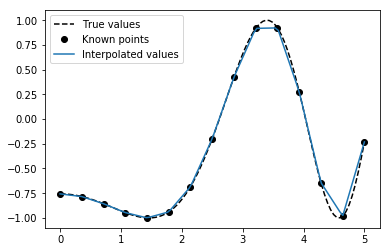

In [31]:
plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()

### Linear interpolation:

Linear interpolation is a easy to compute, but isnt precise

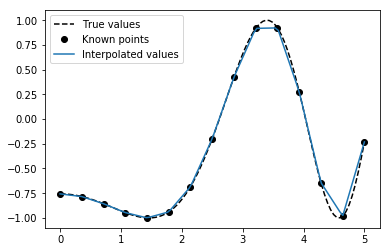

In [32]:
f = interpolate.interp1d(x, y, kind='linear') 
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()

### Nearest-neighbor interpolation

Choose value of the closest known point

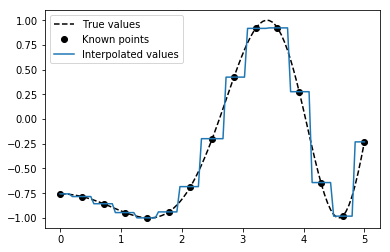

In [33]:
f = interpolate.interp1d(x, y, kind='nearest')
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()

# Matplotlib

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. 
•Generally easy to get started for simple plots
•Support for custom labels and texts
•Great control of every element in a figure
•High-quality output in many formats
•Very customizable in general


In [34]:
## Import the library

import matplotlib.pyplot as plt 

%matplotlib inline 
# use this line to see plots in the notebook

In [35]:
plt.style.use('classic')

## plt.style.available: to check other styles
#The basic way to switch to a stylesheet is to call
#plt.style.use('stylename')

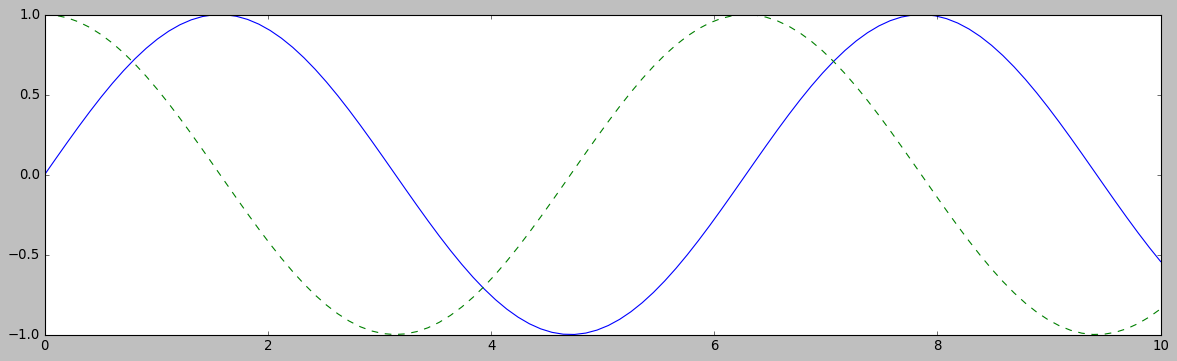

In [36]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(18,5))
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [37]:
##Save the above figure (saved in the location of this notebook)

fig.savefig('my_figure.png')

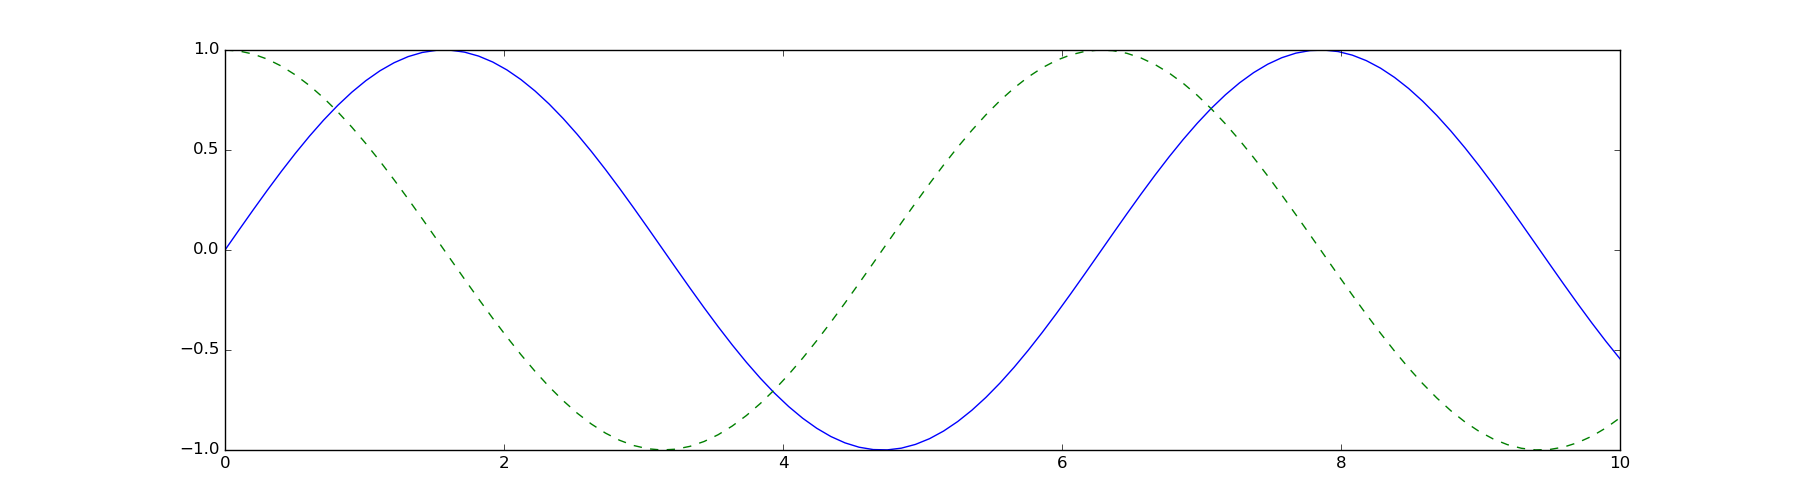

In [38]:
## Import the image from a location 

from IPython.display import Image
Image('my_figure.png') # location of the image

## fig.canvas.get_supported_filetypes(): shows you supported file type

Text(0.5,1,'Add Title')

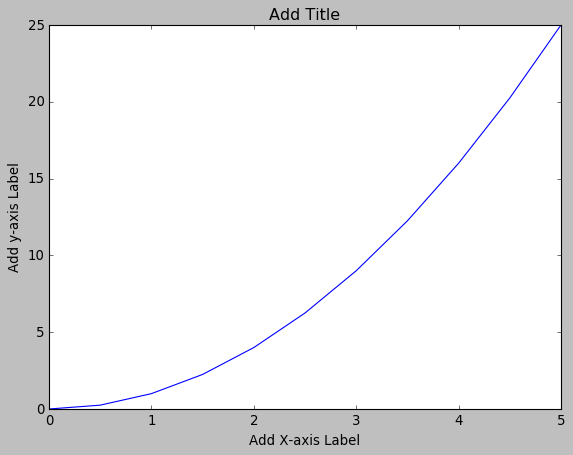

In [39]:
x = np.linspace(0, 5, 11)
y = x ** 2

# Create Figure (empty canvas)
figure = plt.figure()

# Add set of axes to figure
axes = figure.add_axes([0.2, 0.2, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Add X-axis Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Add y-axis Label')
axes.set_title('Add Title')

In [40]:
import pandas as pd
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data',sep='\s+',header=None)
df.columns = ['seq_name','mcg','gvh','alm','mit','erl','pox','vac','nuc','class']

(array([ 12., 126., 184., 544., 507.,  96.,  12.,   1.,   0.,   2.]),
 array([0.21 , 0.289, 0.368, 0.447, 0.526, 0.605, 0.684, 0.763, 0.842,
        0.921, 1.   ]),
 <a list of 10 Patch objects>)

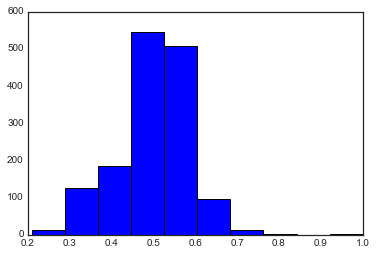

In [41]:
#A simple histogram with and without binning
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.hist(df.alm)

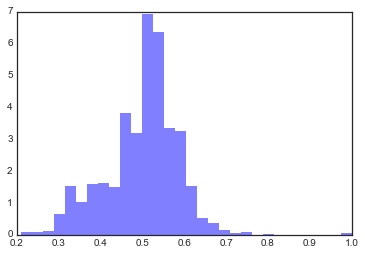

In [42]:
plt.hist(df.alm, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='blue',
         edgecolor='none');

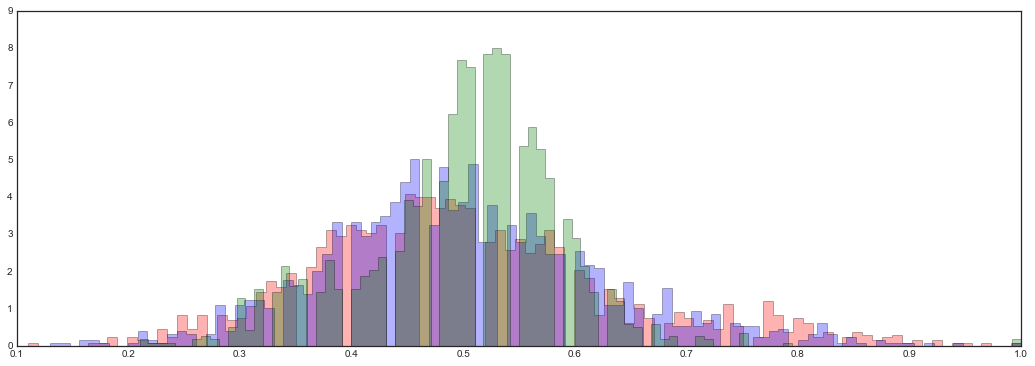

In [43]:
# histogram of different columns on one graph from a single dataset
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=100)
plt.figure(figsize=(18,6))
plt.hist(df.mcg, **kwargs , color = 'r')
plt.hist(df.gvh, **kwargs, color = 'b')
plt.hist(df.alm, **kwargs, color = 'g');

In [44]:
#plot a two-dimensional histogram is to use Matplotlib's plt.hist2d function
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data',header=None)
data.columns = ['sl','sw','pl','pw','class']

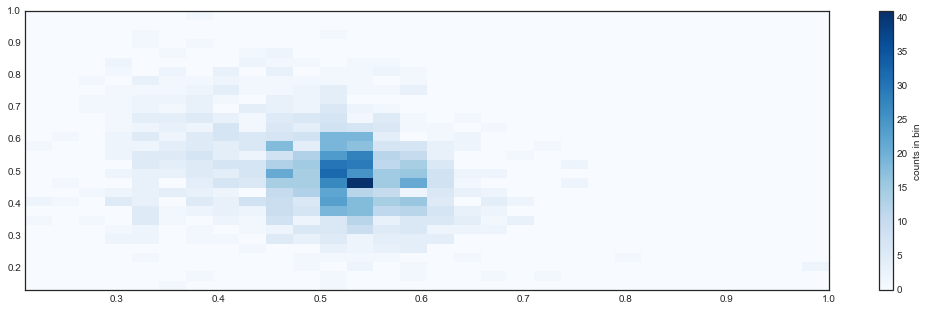

In [45]:
#plot a two-dimensional histogram is to use Matplotlib's plt.hist2d function
plt.figure(figsize=(18,5))
plt.hist2d(df.alm, df.gvh, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

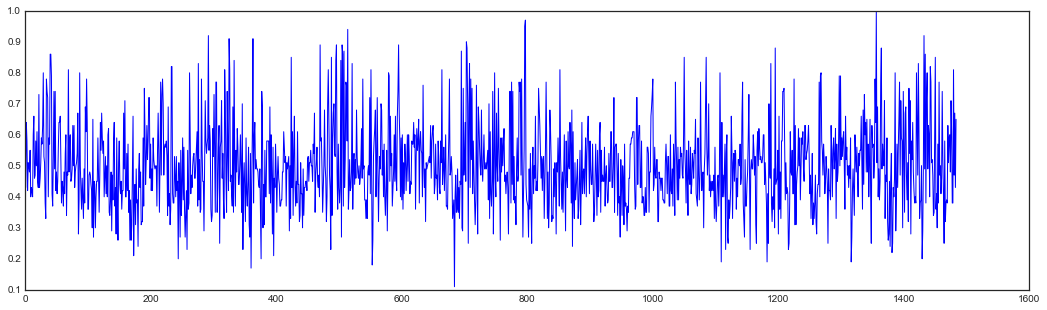

In [46]:
plt.figure(figsize=(18,5))
for i in range(1): ## try for different ranges 
    plt.plot(df.mcg)

In [47]:
#create a function that will make two basic types of plot
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(18, 4))
    ax[0].hist(df.mcg)
    for i in range(3):
        ax[1].plot(df.mit)
    ax[1].legend(['mit'], loc='upper right')

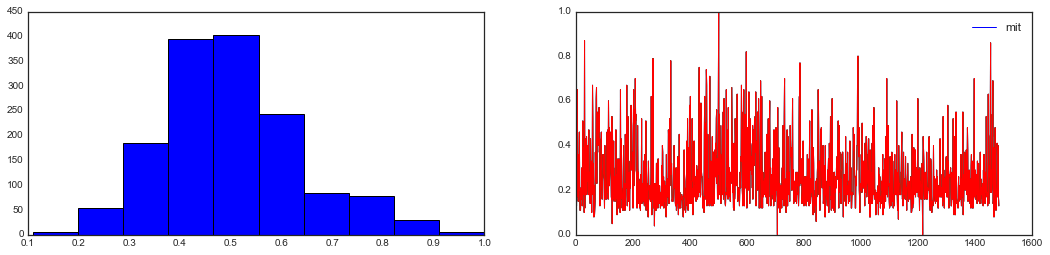

In [48]:
hist_and_lines()

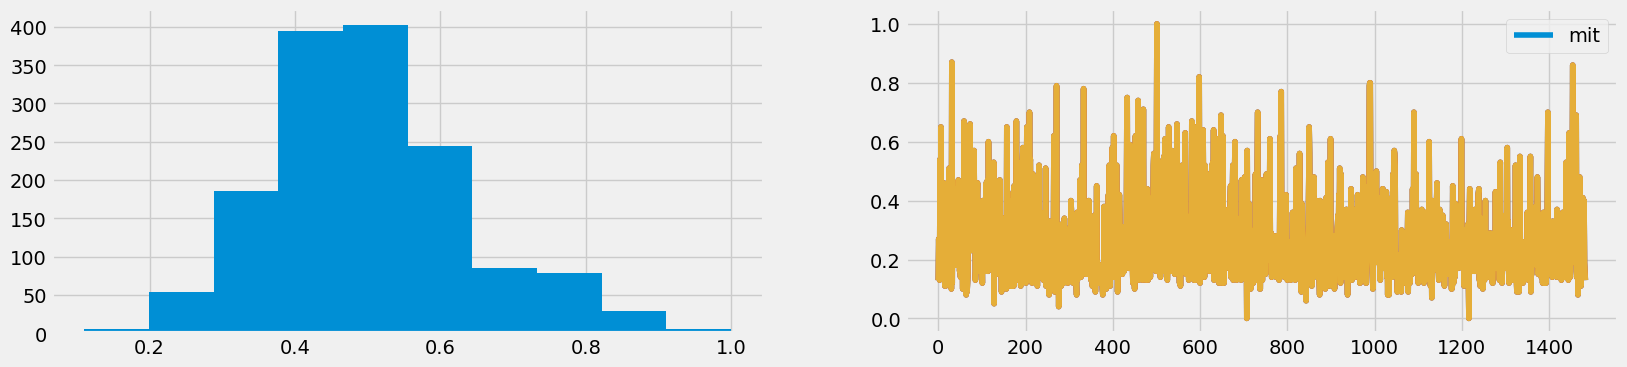

In [49]:
# reset rcParams
plt.rcParams.update(plt.rcParamsDefault)

with plt.style.context('fivethirtyeight'):
    hist_and_lines()

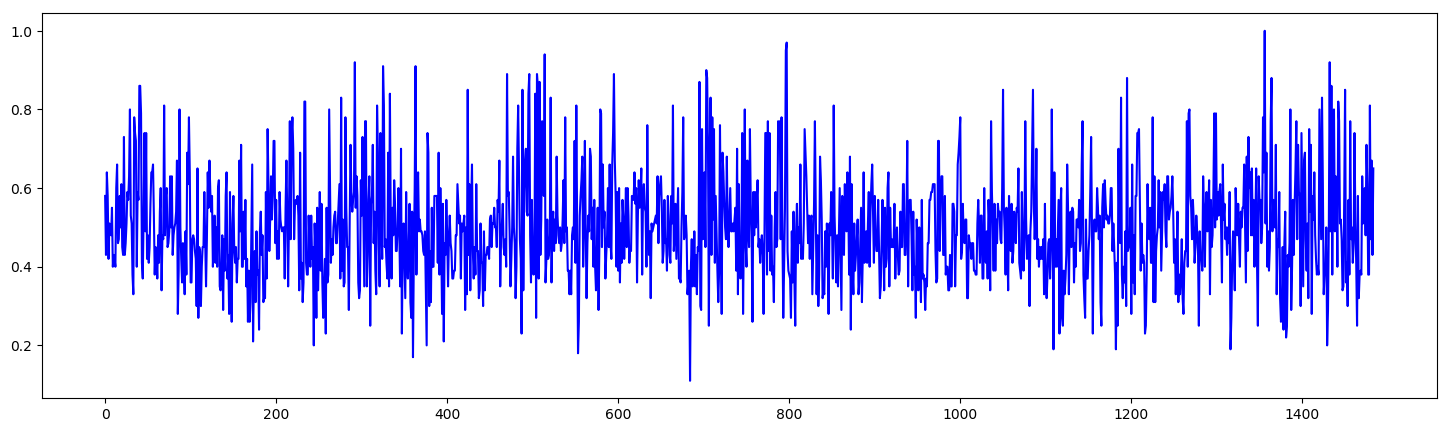

In [50]:
plt.figure(figsize=(18,5))
plt.plot(df.mcg, color='blue') # specify color by name

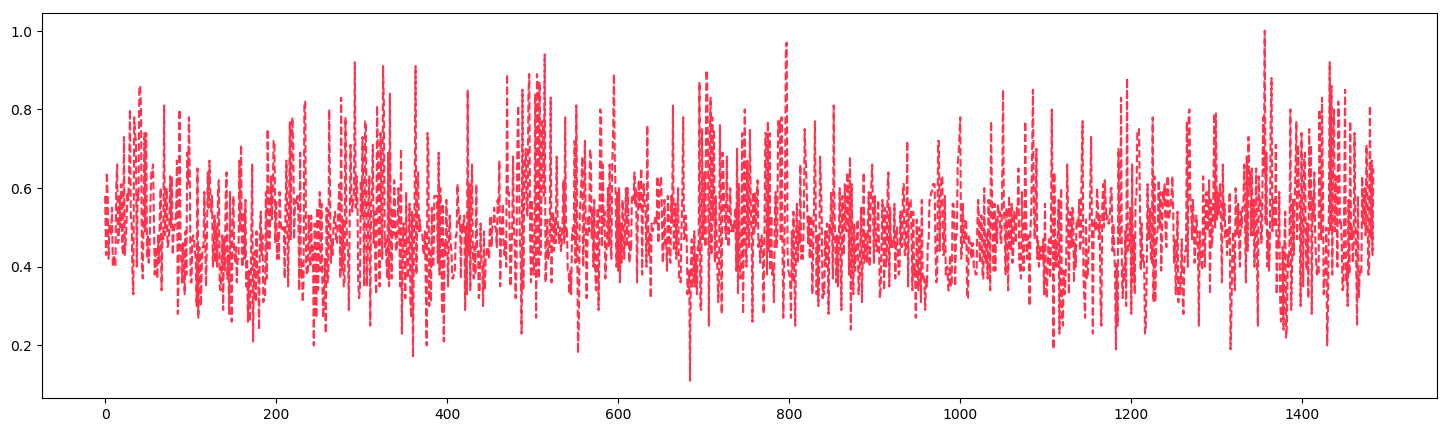

In [51]:
plt.figure(figsize=(18,5))        # RGB tuple, values 0 to 1
plt.plot(df.mcg, color=(1.0,0.2,0.3),linestyle='--') 

## linestyle = "--"

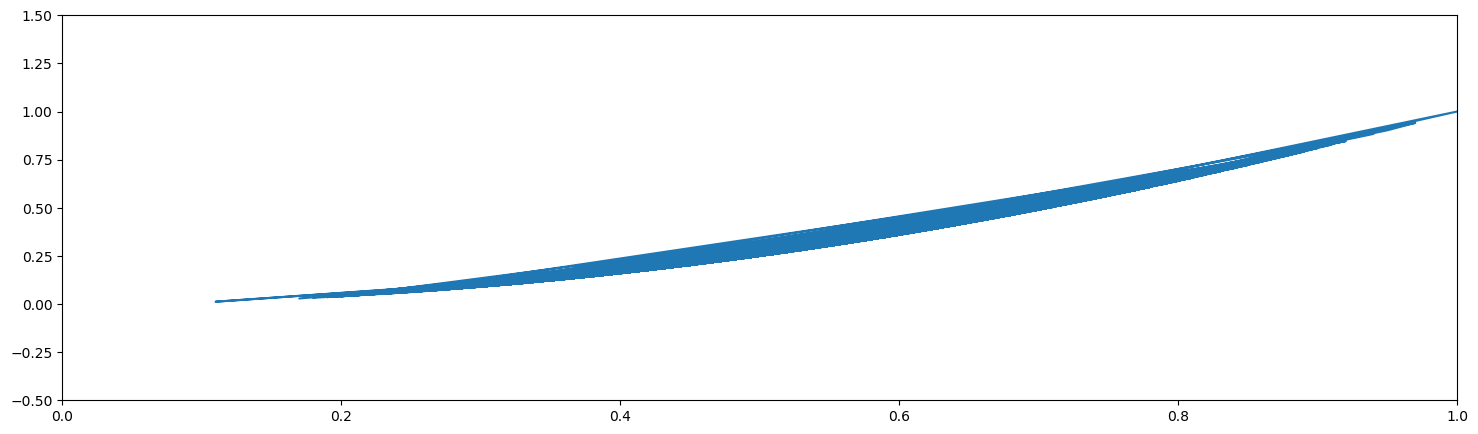

In [52]:
#Adjusting the Plot: Axes Limits
plt.figure(figsize=(18,5)) 
plt.plot(df.mcg, np.square(df.mcg))
plt.xlim(0, 1)
plt.ylim(-0.5, 1.5);

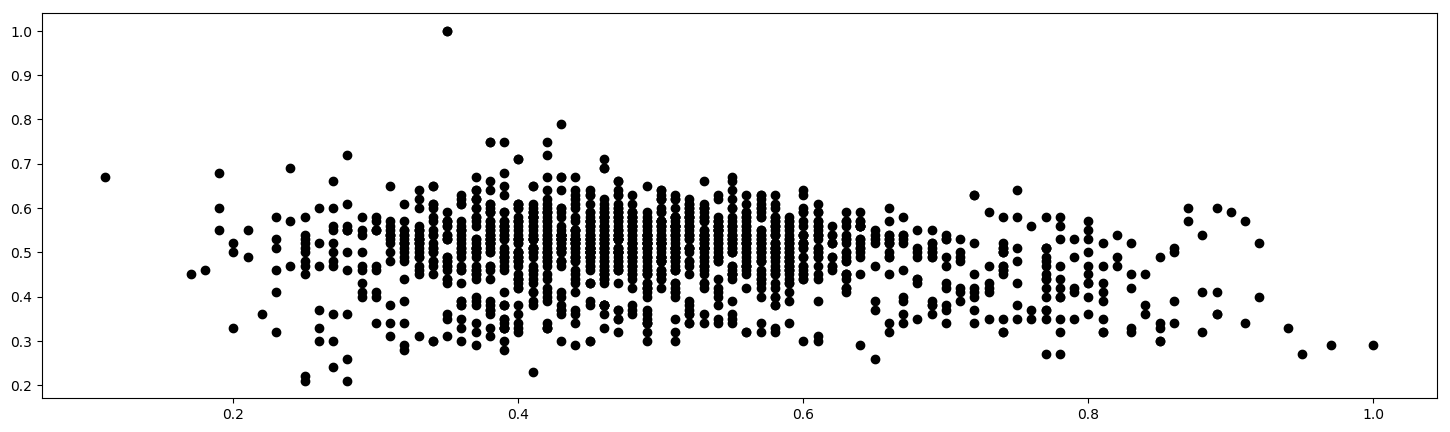

In [53]:
x = df.mcg
y = df.alm
plt.figure(figsize=(18,5))
plt.plot(x, y, 'o', color='black');

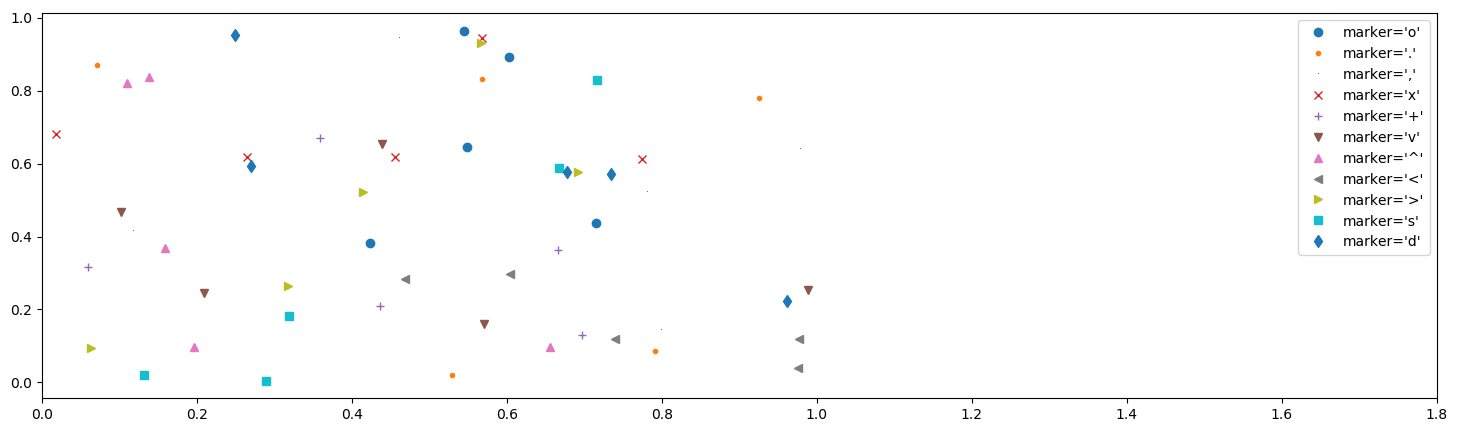

In [54]:
plt.figure(figsize=(18,5))
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

In [55]:
df.head()

,seq_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


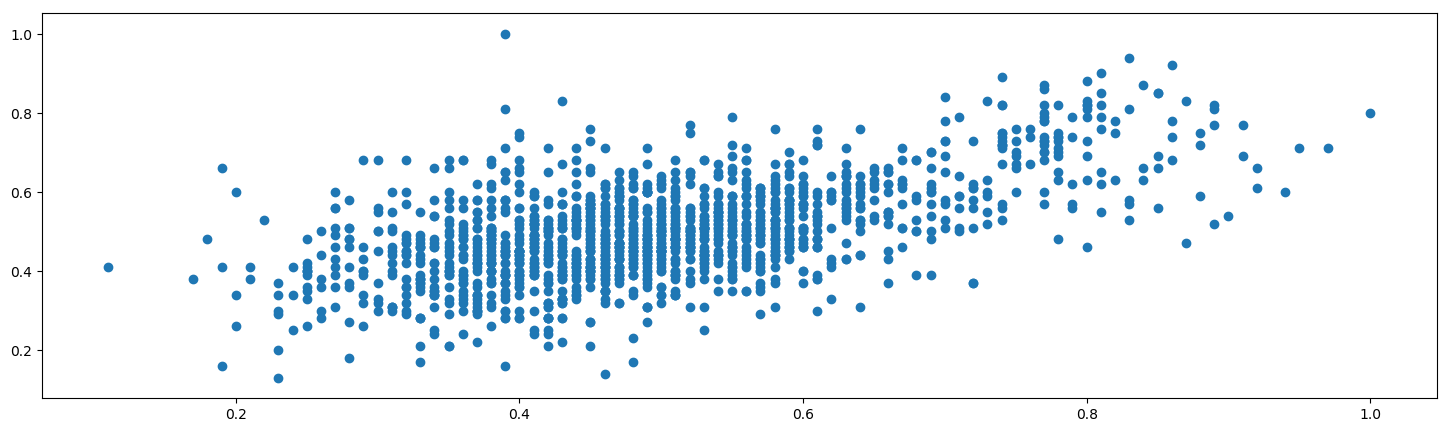

In [56]:
## Scatter plot

plt.figure(figsize=(18,5))
plt.scatter(df.mcg, df.gvh, marker='o');

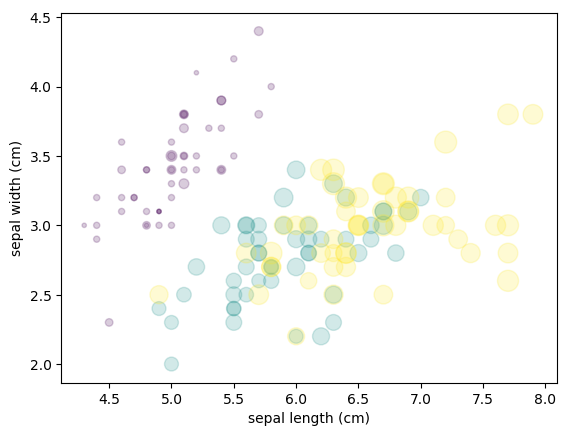

In [57]:
## Scatter plot on iris data set

from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

#plt.plot should be preferred over plt.scatter for large datasets due to performance issues

#### 3D plotting

In [58]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data',header=None)
data.columns = ['sl','sw','pl','pw','class']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl       150 non-null float64
sw       150 non-null float64
pl       150 non-null float64
pw       150 non-null float64
class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Text(0.5,0,'pl')

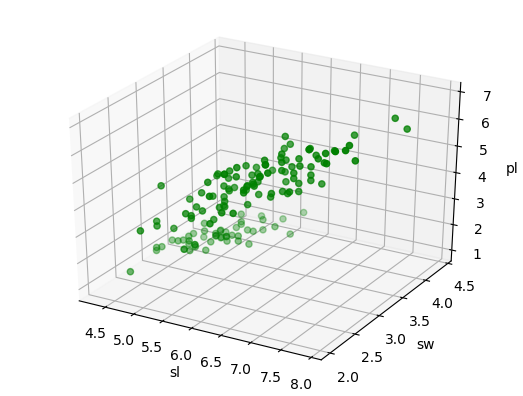

In [61]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data.sl
y = data.sw
z = data.pl



ax.scatter(x, y, z, c='g', marker='o')

ax.set_xlabel('sl')
ax.set_ylabel('sw')
ax.set_zlabel('pl')

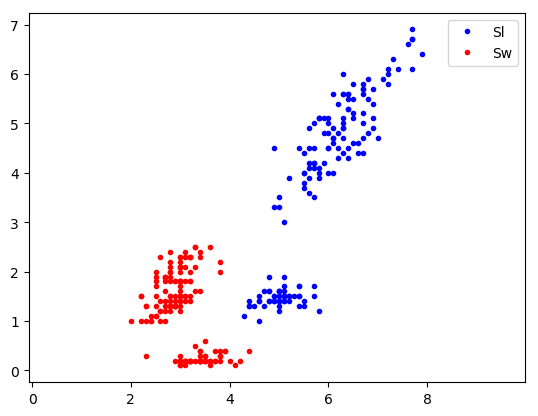

In [62]:
# Scatter plot with 2 attributes

fig, ax = plt.subplots()
ax.plot(data.sl, data.pl, '.b', label='Sl')
ax.plot(data.sw, data.pw, '.r', label='Sw')
ax.axis('equal')
leg = ax.legend();

# Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

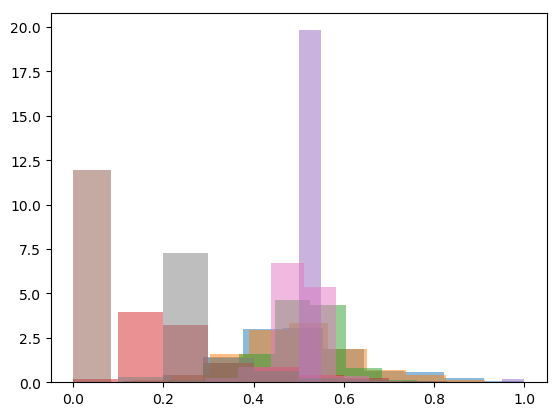

In [63]:
import seaborn as sns

## Histogram plot of columns

data1 = df 
data1 = pd.DataFrame(data1, columns=['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'])
cols = data1.columns
for col in cols:
    plt.hist(data1[col], normed=True, alpha=0.5)

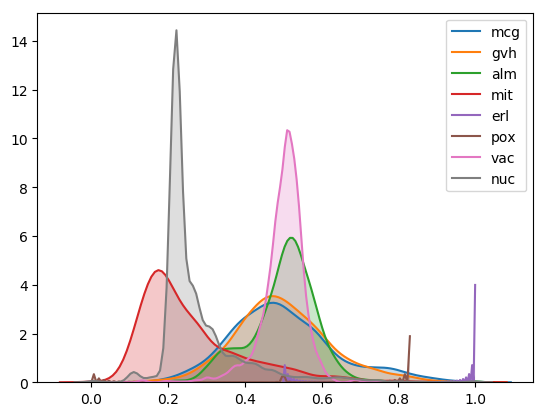

In [64]:
## KDE plot for columns 

for col in cols:
    sns.kdeplot(data1[col], shade=True)

C:\Users\Aeon\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


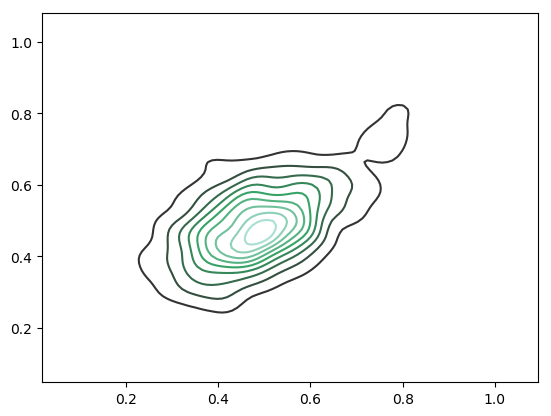

In [65]:
##  on the complete data 

sns.kdeplot(data1)

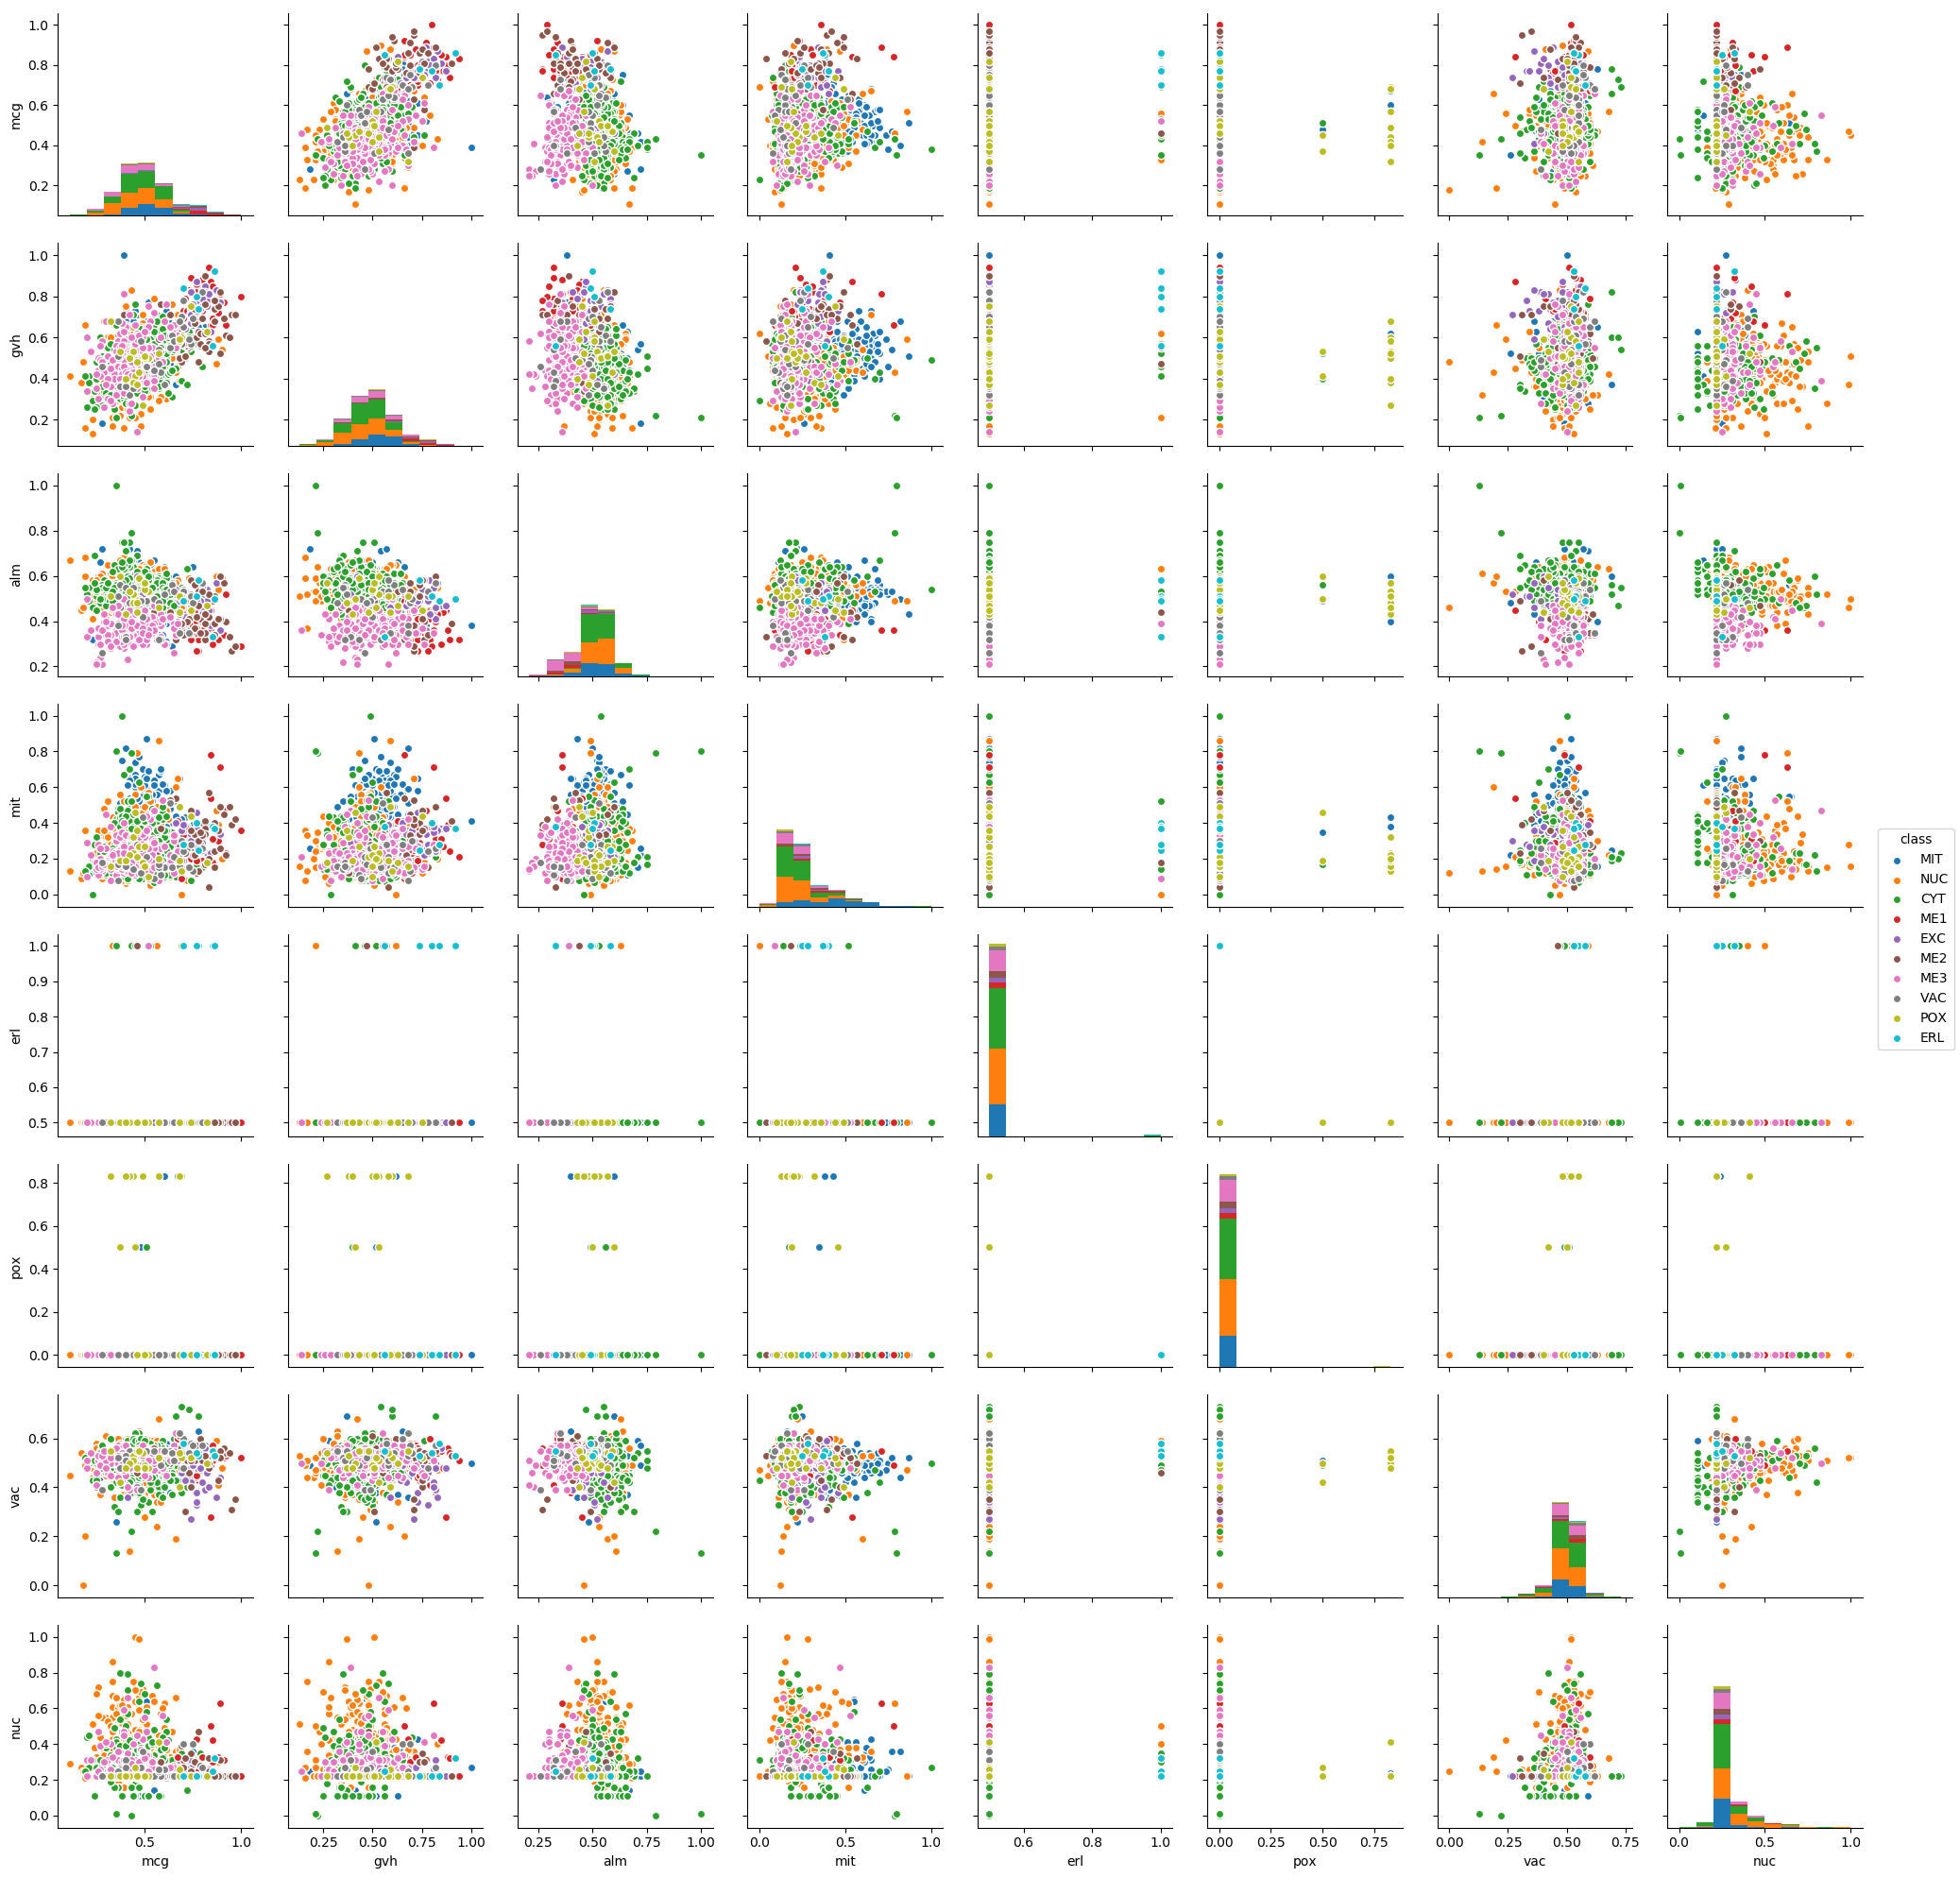

In [66]:
## Pair plot:

sns.pairplot(df, hue='class', size=2.5)

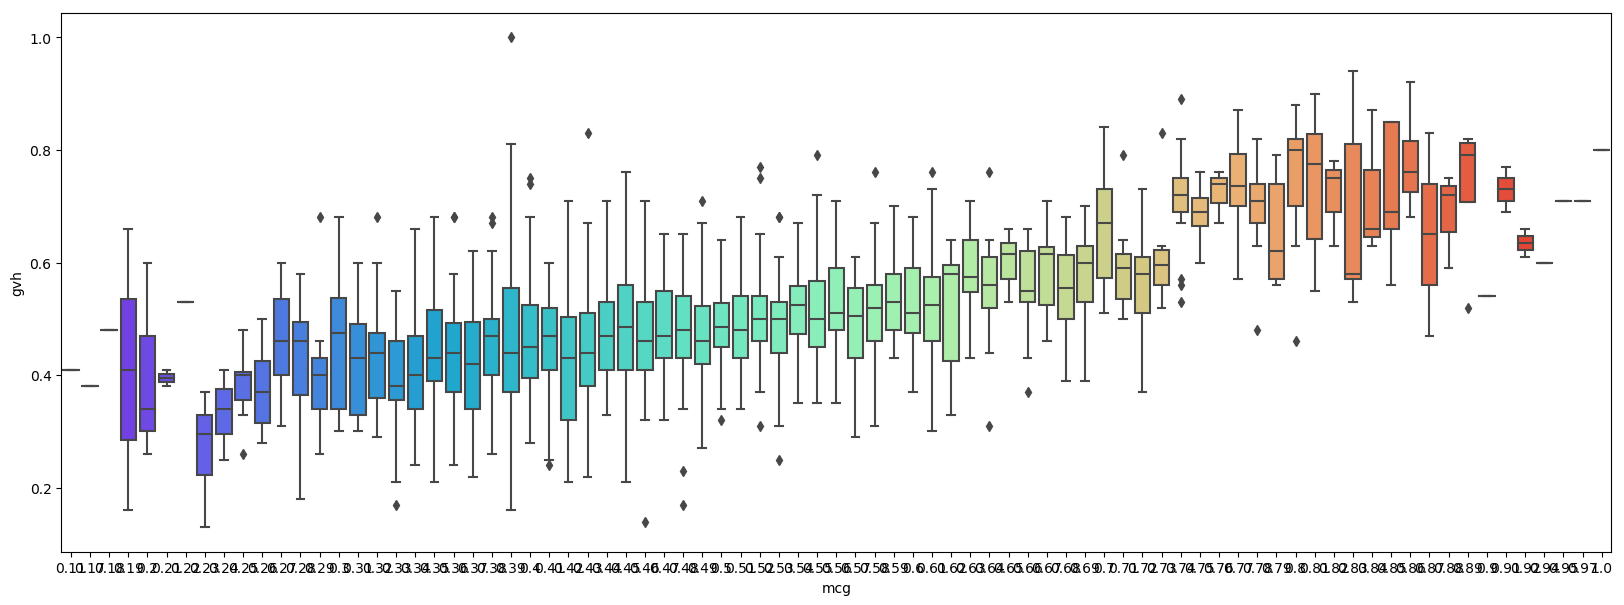

In [67]:
## Boxplot 

fig = plt.figure(figsize=(20,7))
sns.boxplot(x='mcg',y='gvh',data=data1,palette='rainbow')

# data.info()

Text(0.5,1,'data1.corr()')

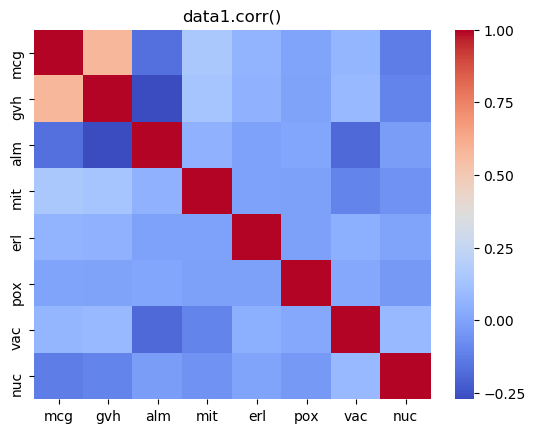

In [68]:
## Correlation plot:

sns.heatmap(data1.corr(),cmap='coolwarm')
plt.title('data1.corr()')